In [1]:
#задаём директорию
import os
os.chdir('C:/Users/User/Desktop/Анализ данных/ЛР3/02_Математика профильная')

In [2]:
#загружаем файл и его первые десять строк
import pandas as pd
import numpy as np
data = pd.read_excel('rating.xlsx', header = 0,nrows=2356)
data=data.drop('№',axis=1)
data.head(10)

,Код ППЭ,Код АТЕ,Код ОО,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,114,124,122403,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,126,128,122811,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,133,132,123209,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,138,134,123404,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,147,136,123603,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
5,152,136,123617,11,М,342,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
6,152,136,123617,11,М,341,+-----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
7,114,124,122403,11,Ж,339,----+---+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2,9,27
8,146,127,122718,11,М,341,+-----+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2,9,27
9,146,127,122758,11,Ж,343,-+-+--------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,2,9,27


In [3]:
#описательная статистика по среднему баллу
data['Балл'].describe(include='all')

count    2356.000000
mean       49.255093
std        17.880420
min         5.000000
25%        33.000000
50%        50.000000
75%        68.000000
max        96.000000
Name: Балл, dtype: float64

In [4]:
#процент учащихся не сдавших экзамен
round(data[data['Балл']<data['Минимальный балл']]['Балл'].count()/data['Балл'].count()*100,2)

9.21

In [5]:
#гистограмма распределения баллов за экзамен
import matplotlib
data['Балл'].hist(normed=1,bins=60)

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2477: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


In [6]:
#процент учащихся, выполнивших работу ниже среднего
av=data['Балл'].mean()
round(data[data['Балл']<av]['Балл'].count()/data['Балл'].count()*100,2)

48.01

Text(0.5, 1.0, 'сдавшие/несдавшие')

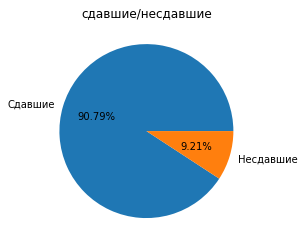

In [7]:
#круговая диаграмма сдавших и не сдавших экзамен
import matplotlib.pyplot as plt
al=data['Балл'].count()
nesd=data[data['Балл']<data['Минимальный балл']]['Балл'].count()
labels=["Сдавшие","Несдавшие"]
values=[(al-nesd),nesd]
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('сдавшие/несдавшие')

In [8]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace

Text(0.5, 1.0, 'гауссова плотность')

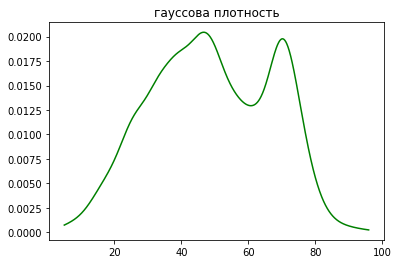

In [9]:
#моделирование функции плотности распределения
my_density = gaussian_kde(data['Балл'])
import matplotlib.pyplot as plt
#строится последовательность
x = linspace(min(data['Балл']), max(data['Балл']),1000)
plt.plot(x, my_density(x),'g')
plt.title('гауссова плотность')

Text(0.5, 1.0, '% оценок')

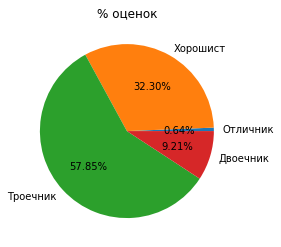

In [10]:
#круговая диаграмма, демонстрирующая процентное соотношение различных оценок за экзамен
al=data['Балл'].count()
neud=data[data['Балл']<27]['Балл'].count()
ud=data[(data['Балл']>=27) & (data['Балл']<60)]['Балл'].count()
hor=data[(data['Балл']>=60) & (data['Балл']<86)]['Балл'].count()
otl=data[data['Балл']>=86]['Балл'].count()
labels=["Отличник","Хорошист","Троечник","Двоечник"]
values=[otl,hor,ud,neud]
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('% оценок')

Text(0.5, 1.0, 'распределение по полу')

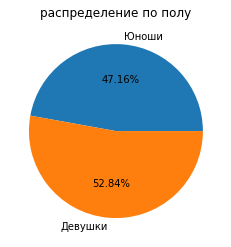

In [11]:
#круговая диаграмма, демонстрирующая процентное соотношение юношей и девушек
m=len(data[data['Пол']=='М'])
f=len(data[data['Пол']=='Ж'])
labels=["Юноши","Девушки"]
values=[m,f]
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('распределение по полу')

In [12]:
#расчёт значений для графика ниже
dgb=data.groupby('Пол')['Балл'].mean()
av_m=round(list(dgb.values)[1],2)
av_f=round(list(dgb.values)[0],2)
m=list(data[data['Пол']=='М']['Балл'])
f=list(data[data['Пол']=='Ж']['Балл'])
f=f[0:len(m)]
x=[i for i in range(len(m))]

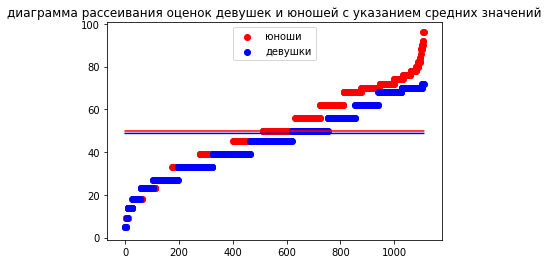

In [13]:
#диаграмма рассеивания оценок девушек и юношей с указанием средних значений
import matplotlib.pyplot as plt
plt.scatter(x,m,color='red', label='юноши')
plt.scatter(x,f,color='blue', label='девушки')
plt.plot(x,[av_m for i in range(len(m))],color='red')
plt.plot(x,[av_f for i in range(len(m))],color='blue')
plt.title('диаграмма рассеивания оценок девушек и юношей с указанием средних значений')
plt.legend(loc=9)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\User\Anaconda3\lib\s

Text(0.5, 1.0, 'Разброс оценок')

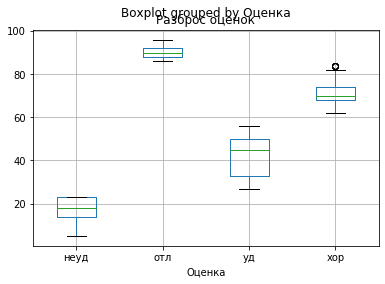

In [114]:
#распределение баллов участников разных подгрупп
data['Оценка']='оценка'
data['Оценка'][data['Балл']<27]='неуд'
data['Оценка'][(data['Балл']>=27) & (data['Балл']<60)]='уд'
data['Оценка'][(data['Балл']>=60) & (data['Балл']<86)]='хор'
data['Оценка'][data['Балл']>=86]='отл'
import matplotlib.pyplot 
import matplotlib.pyplot as plt
#конструкция для построения сразу нескольких графиков
data.boxplot(column='Балл', by='Оценка')
plt.title('Разброс оценок')

Text(0.5, 1.0, 'средний балл по ате')

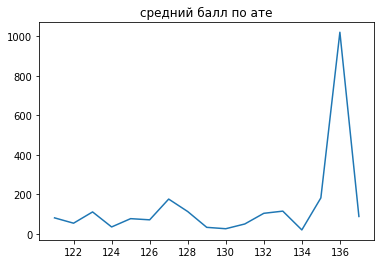

In [15]:
#график среднего балла
av_mark=data.groupby('Код АТЕ')['Балл'].count()
av_m=list(av_mark.values)
x=list(av_mark.index)
import matplotlib.pyplot as plt
plt.plot(x,av_m)
plt.title('средний балл по ате')

In [16]:
#количество школ, принимающих экзамены
len(data['Код АТЕ'].unique())

17

In [17]:
#количество заданий с кратким ответом
len(data.loc[0,'Задания с кратким ответом'])

12

In [18]:
#количество заданий с развёрнутым ответом
int(len(data.loc[0,'Задания с развёрнутым ответом'])/4)

7

In [55]:
#подготовка данных
short_ans = pd.DataFrame(data['Задания с кратким ответом'].str.split(pat='',expand=True))
short_ans=short_ans.drop([0], axis=1)
short_ans=short_ans.drop([short_ans.shape[1]], axis=1)
long_ans = pd.DataFrame(data['Задания с развёрнутым ответом'].str.split(pat='',expand=True))
long_ans=long_ans.drop([0], axis=1)
long_ans=long_ans.drop([long_ans.shape[1]], axis=1)
ll=long_ans.shape[1]
delt=[]
for i in range(2,ll+1,2):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
delt=[]
for i in range(3,ll,4):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
long_ans.columns=[i for i in range(1,int(len(data.loc[0,'Задания с развёрнутым ответом'])/4)+1)]

Text(0.5, 1.0, 'Задание № B1')

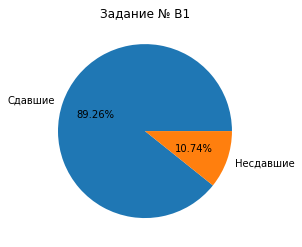

In [20]:
#демонстрация распределения сдавших/несдавших задание части В
#no - впишите нужный номер задачи
no=1
sd=short_ans.loc[short_ans.loc[:,no]=='+'][no].count()
nesd=len(short_ans)-sd
values=[sd,nesd]
labels=['Сдавшие','Несдавшие']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № B'+str(no))

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2410: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


Text(0.5, 1.0, 'распределение % выполненных заданий части В')

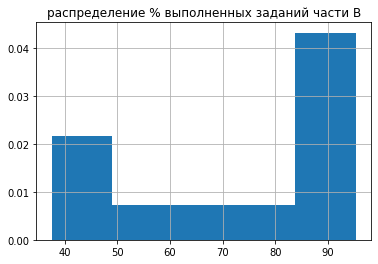

In [21]:
#гистограмма % выполненных заданий части В
pr_sd=[]
for no in range(1,13):
    sd=short_ans.loc[short_ans.loc[:,no]=='+'][no].count()
    pr_sd.append(round(sd/len(short_ans)*100,2))
import matplotlib    
pd.DataFrame(pr_sd).hist(bins=5, normed=1)
import matplotlib.pyplot as plt
plt.title("распределение % выполненных заданий части В")

Text(0.5, 1.0, '% выполненных заданий части В')

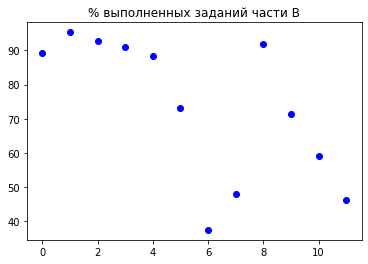

In [22]:
#диаграмма рассеивания % выполненных заданий части В
x=[i for i in range(len(pr_sd))]
import matplotlib.pyplot as plt
plt.scatter(x,pr_sd,color='blue')
plt.title('% выполненных заданий части В')

Text(0.5, 1.0, 'Задание № C7')

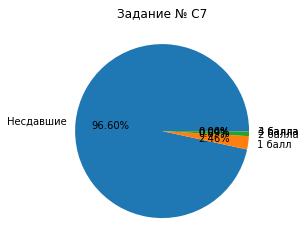

In [23]:
#демонстрация распределения сдавших/несдавших задание части С
#no - впишите нужный номер задачи
no=7
nesd=long_ans.loc[long_ans.loc[:,no]=='0'][no].count()
onep=long_ans.loc[long_ans.loc[:,no]=='1'][no].count()
twop=long_ans.loc[long_ans.loc[:,no]=='2'][no].count()
threep=long_ans.loc[long_ans.loc[:,no]=='3'][no].count()
fourp=long_ans.loc[long_ans.loc[:,no]=='4'][no].count()
if no<=3:
    values=[nesd,onep,twop]
    labels=['Несдавшие','1 балл', '2 балла'] 
elif no<=5:
    values=[nesd,onep,twop,threep]
    labels=['Несдавшие','1 балл', '2 балла','3 балла']
elif ((no>5)&(no<=7)):
    values=[nesd,onep,twop,threep,fourp]
    labels=['Несдавшие','1 балл', '2 балла','3 балла','4 балла']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № C'+str(no))

Text(0.5, 1.0, 'распределение % выполненных заданий части C')

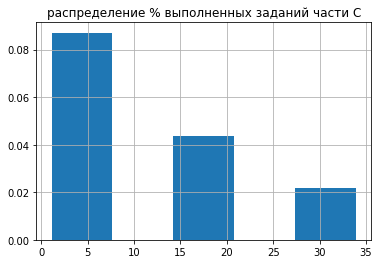

In [24]:
#гистограмма % выполненных заданий части C
pr_sd=[]
for no in range(1,8):
    sd=len(long_ans)-long_ans.loc[long_ans.loc[:,no]=='0'][no].count()
    pr_sd.append(round(sd/len(long_ans)*100,2))
pr_sd    
import matplotlib    
pd.DataFrame(pr_sd).hist(bins=5, normed=1)
import matplotlib.pyplot as plt
plt.title("распределение % выполненных заданий части C")

Text(0.5, 1.0, '% выполненных заданий части C')

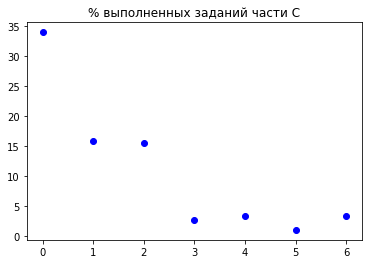

In [25]:
#диаграмма рассеивания % выполненных заданий части C
x=[i for i in range(len(pr_sd))]
import matplotlib.pyplot as plt
plt.scatter(x,pr_sd,color='blue')
plt.title('% выполненных заданий части C')

In [26]:
#подготовка данных для сравнительного анализа двух школ
sch1=data['Код АТЕ'].unique()[0]
sch2=data['Код АТЕ'].unique()[1]
data_sch1=data[data['Код АТЕ']==sch1]
data_sch2=data[data['Код АТЕ']==sch2]

In [27]:
#описательная статистика для первой школы
data_sch1.loc[:,['Балл','Первичный балл']].describe(include='all')

,Балл,Первичный балл
count,35.000000,35.000000
mean,36.542857,7.542857
std,16.310125,3.109216
min,5.000000,1.000000
25%,27.000000,6.000000
50%,33.000000,7.000000
75%,45.000000,9.000000
max,72.000000,15.000000


In [28]:
#описательная статистика для второй школы
data_sch2.loc[:,['Балл','Первичный балл']].describe(include='all')

,Балл,Первичный балл
count,113.000000,113.000000
mean,44.115044,8.920354
std,16.071688,3.082617
min,5.000000,1.000000
25%,39.000000,8.000000
50%,45.000000,9.000000
75%,56.000000,11.000000
max,76.000000,17.000000


Text(0.5, 1.0, 'Сравнение средних баллов двух школ')

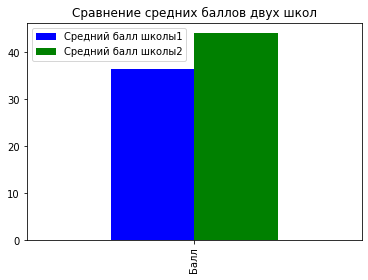

In [98]:
#Сравнение средних баллов двух школ
comp=pd.DataFrame()
comp['Средний балл школы1']=data_sch1.loc[:,['Балл']].mean()
comp['Средний балл школы2']=data_sch2.loc[:,['Балл']].mean()
import matplotlib.pyplot 
import matplotlib.pyplot as plt
comp.plot(kind='bar',color=['blue','green'])
plt.title("Сравнение средних баллов двух школ")

In [29]:
#процент несдавших для первой школы
round(data_sch1[data_sch1['Балл']<data_sch1['Минимальный балл']]['Балл'].count()/data_sch1['Балл'].count()*100,2)

22.86

In [30]:
#процент несдавших для второй школы
round(data_sch2[data_sch2['Балл']<data_sch2['Минимальный балл']]['Балл'].count()/data_sch2['Балл'].count()*100,2)

15.04

In [31]:
#процент написавших ниже среднего для первой школы
av=data_sch1['Балл'].mean()
round(data_sch1[data_sch1['Балл']<av]['Балл'].count()/data_sch1['Балл'].count()*100,2)

65.71

In [32]:
#процент написавших ниже среднего для второй школы
av=data_sch2['Балл'].mean()
round(data_sch2[data_sch2['Балл']<av]['Балл'].count()/data_sch2['Балл'].count()*100,2)

44.25

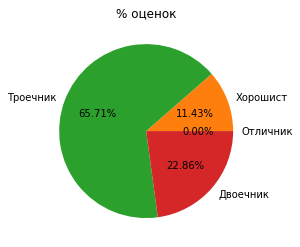

In [65]:
#распределение по оценкам для первой школы
al=data_sch1['Балл'].count()
neud=data_sch1[data_sch1['Балл']<27]['Балл'].count()
ud=data_sch1[(data_sch1['Балл']>=27) & (data_sch1['Балл']<60)]['Балл'].count()
hor=data_sch1[(data_sch1['Балл']>=60) & (data_sch1['Балл']<86)]['Балл'].count()
otl=data_sch1[data_sch1['Балл']>=86]['Балл'].count()
labels=["Отличник","Хорошист","Троечник","Двоечник"]
values=[otl,hor,ud,neud]
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('% оценок')
m1=[]
m1.append(neud)
m1.append(ud)
m1.append(hor)
m1.append(otl)

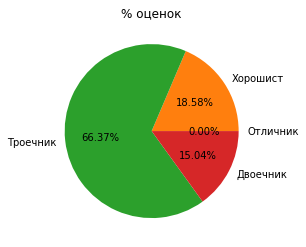

In [66]:
#распределение по оценкам для второй школы
al=data_sch2['Балл'].count()
neud=data_sch2[data_sch2['Балл']<27]['Балл'].count()
ud=data_sch2[(data_sch2['Балл']>=27) & (data_sch2['Балл']<60)]['Балл'].count()
hor=data_sch2[(data_sch2['Балл']>=60) & (data_sch2['Балл']<86)]['Балл'].count()
otl=data_sch2[data_sch2['Балл']>=86]['Балл'].count()
labels=["Отличник","Хорошист","Троечник","Двоечник"]
values=[otl,hor,ud,neud]
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('% оценок')
m2=[]
m2.append(neud)
m2.append(ud)
m2.append(hor)
m2.append(otl)

Text(0.5, 1.0, 'Сравнение оценок двух школ')

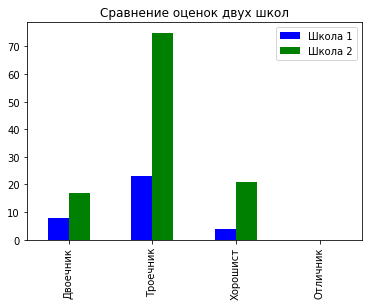

In [95]:
#сравнение школ по оценкам
comp=pd.DataFrame(index=['Двоечник','Троечник','Хорошист','Отличник'])
comp['Школа 1']=m1
comp['Школа 2']=m2
import matplotlib.pyplot 
import matplotlib.pyplot as plt
comp.plot(kind='bar',color=['blue','green'])
plt.title("Сравнение оценок двух школ")

Text(0.5, 1.0, 'Задание № B1')

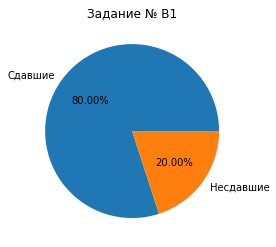

In [81]:
#подготовка данных
#демонстрация распределения сдавших/несдавших задание части В для первой школы
#no - впишите нужный номер задачи
no=1
short_ans = pd.DataFrame(data_sch1['Задания с кратким ответом'].str.split(pat='',expand=True))
short_ans=short_ans.drop([0], axis=1)
short_ans=short_ans.drop([short_ans.shape[1]], axis=1)
long_ans = pd.DataFrame(data_sch1['Задания с развёрнутым ответом'].str.split(pat='',expand=True))
long_ans=long_ans.drop([0], axis=1)
long_ans=long_ans.drop([long_ans.shape[1]], axis=1)
ll=long_ans.shape[1]
delt=[]
for i in range(2,ll+1,2):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
delt=[]
for i in range(3,ll,4):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
long_ans.columns=[i for i in range(1,int(len(data_sch1.loc[0,'Задания с развёрнутым ответом'])/4)+1)]
sd=short_ans.loc[short_ans.loc[:,no]=='+'][no].count()
nesd=len(short_ans)-sd
values=[sd,nesd]
labels=['Сдавшие','Несдавшие']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № B'+str(no))

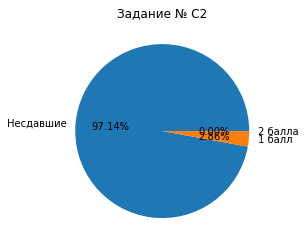

In [83]:
#демонстрация распределения сдавших/несдавших задание части С для первой школы
#no - впишите нужный номер задачи
no=2
nesd=long_ans.loc[long_ans.loc[:,no]=='0'][no].count()
onep=long_ans.loc[long_ans.loc[:,no]=='1'][no].count()
twop=long_ans.loc[long_ans.loc[:,no]=='2'][no].count()
threep=long_ans.loc[long_ans.loc[:,no]=='3'][no].count()
fourp=long_ans.loc[long_ans.loc[:,no]=='4'][no].count()
if no<=3:
    values=[nesd,onep,twop]
    labels=['Несдавшие','1 балл', '2 балла'] 
elif no<=5:
    values=[nesd,onep,twop,threep]
    labels=['Несдавшие','1 балл', '2 балла','3 балла']
elif ((no>5)&(no<=7)):
    values=[nesd,onep,twop,threep,fourp]
    labels=['Несдавшие','1 балл', '2 балла','3 балла','4 балла']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № C'+str(no))
c1=[]
c1.append(long_ans.loc[long_ans.loc[:,1]=='1'][1].count())
c1.append(long_ans.loc[long_ans.loc[:,2]=='1'][2].count())
c1.append(long_ans.loc[long_ans.loc[:,3]=='1'][3].count())

Text(0.5, 1.0, 'Задание № B1')

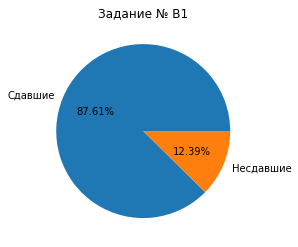

In [84]:
#подготовка данных
#демонстрация распределения сдавших/несдавших задание части В для второй школы
#no - впишите нужный номер задачи
no=1
short_ans = pd.DataFrame(data_sch2['Задания с кратким ответом'].str.split(pat='',expand=True))
short_ans=short_ans.drop([0], axis=1)
short_ans=short_ans.drop([short_ans.shape[1]], axis=1)
long_ans = pd.DataFrame(data_sch2['Задания с развёрнутым ответом'].str.split(pat='',expand=True))
long_ans=long_ans.drop([0], axis=1)
long_ans=long_ans.drop([long_ans.shape[1]], axis=1)
ll=long_ans.shape[1]
delt=[]
for i in range(2,ll+1,2):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
delt=[]
for i in range(3,ll,4):
    delt.append(i)
long_ans=long_ans.drop(delt, axis=1)  
long_ans.columns=[i for i in range(1,int(len(data_sch2.loc[1,'Задания с развёрнутым ответом'])/4)+1)]
sd=short_ans.loc[short_ans.loc[:,no]=='+'][no].count()
nesd=len(short_ans)-sd
values=[sd,nesd]
labels=['Сдавшие','Несдавшие']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № B'+str(no))

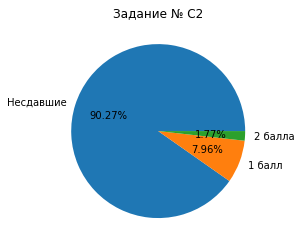

In [86]:
#демонстрация распределения сдавших/несдавших задание части С для второй школы
#no - впишите нужный номер задачи
no=2
nesd=long_ans.loc[long_ans.loc[:,no]=='0'][no].count()
onep=long_ans.loc[long_ans.loc[:,no]=='1'][no].count()
twop=long_ans.loc[long_ans.loc[:,no]=='2'][no].count()
threep=long_ans.loc[long_ans.loc[:,no]=='3'][no].count()
fourp=long_ans.loc[long_ans.loc[:,no]=='4'][no].count()
if no<=3:
    values=[nesd,onep,twop]
    labels=['Несдавшие','1 балл', '2 балла'] 
elif no<=5:
    values=[nesd,onep,twop,threep]
    labels=['Несдавшие','1 балл', '2 балла','3 балла']
elif ((no>5)&(no<=7)):
    values=[nesd,onep,twop,threep,fourp]
    labels=['Несдавшие','1 балл', '2 балла','3 балла','4 балла']
import matplotlib.pyplot as plt
plt.pie(x=values,labels=labels,autopct="%1.2f%%")
plt.title('Задание № C'+str(no))
c2=[]
c2.append(long_ans.loc[long_ans.loc[:,1]=='1'][1].count())
c2.append(long_ans.loc[long_ans.loc[:,2]=='1'][2].count())
c2.append(long_ans.loc[long_ans.loc[:,3]=='1'][3].count())

Text(0.5, 1.0, 'Сравнение оценок за C1,C2,C3 двух школ')

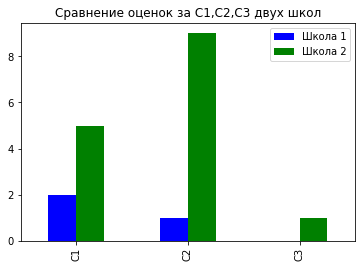

In [99]:
#сравнение школ по выполнению >50% С1,С2 и С3
comp=pd.DataFrame(index=['C1','C2','C3'])
comp['Школа 1']=c1
comp['Школа 2']=c2
import matplotlib.pyplot 
import matplotlib.pyplot as plt
comp.plot(kind='bar',color=['blue','green'])
plt.title("Сравнение оценок за C1,C2,C3 двух школ")